In [1]:
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
import seaborn as sb

In [2]:
class hopfield(object):
    
    def __init__(self, mem_fund=[]):
        
        self.cantidad = len(mem_fund)
        self.dim = mem_fund[0].size
        self.forma = mem_fund[0].shape
        
        self.memo = [np.reshape(k,[1,self.dim]).squeeze() for k in mem_fund]
        
        self.pesos = np.zeros([self.dim,self.dim])
        
        self.neuronas = np.zeros(self.dim)
        
        self.nuevas_neuronas = np.zeros(self.dim)
        
    def entreno(self):
        
        #aux = np.zeros(self.din)
        
        
        for i in range(self.dim):
        
            #aux = 0
        
            for j in np.arange(i,self.dim,1):
                
                aux = 0
                
                for m in self.memo:
                    
                    if i != j:
                        aux = aux + m[j]*m[i]
                        #print(aux)
                    else:
                        aux = 0
            
            
                self.pesos[i,j] = aux/self.cantidad
                self.pesos[j,i] = aux/self.cantidad
                
        
    def recupero(self, patron):
        
        #self.neuronas = np.copy(np.reshape(patron,[1,self.dim]).squeeze())
        self.neuronas = np.zeros([1,self.dim])
        self.nuevas_neuronas = np.copy(np.reshape(patron,[1,self.dim]).squeeze())
        i=0
        #while np.any(self.nuevas_neuronas != self.neuronas):
        while not np.array_equal(self.nuevas_neuronas, self.neuronas):
            self.neuronas = np.copy(self.nuevas_neuronas)
            #index = np.random.randint(0,self.dim-1)
            self.nuevas_neuronas = np.sign(self.pesos@self.neuronas)
            self.nuevas_neuronas[self.nuevas_neuronas==0] = self.neuronas[self.nuevas_neuronas==0]

        
        return np.reshape(self.neuronas,self.forma)

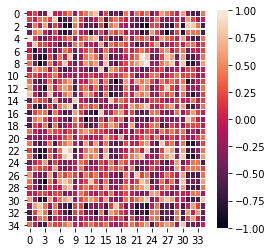

In [38]:
# -1 Blanco
# 1 Negro

n1 = [[-1,-1,1,-1,-1],[-1,1,1,-1,-1],[-1,-1,1,-1,-1],[-1,-1,1,-1,-1],[-1,-1,1,-1,-1],[-1,-1,1,-1,-1],[-1,1,1,1,-1]]
n2 = [[-1,1,1,1,-1],[1,-1,-1,-1,1],[-1,-1,-1,-1,1],[-1,1,1,1,-1],[1,-1,-1,-1,-1],[1,-1,-1,-1,-1],[-1,1,1,1,1]]
n3 = [[-1,1,1,1,-1],[1,-1,-1,-1,1],[-1,-1,-1,-1,1],[-1,1,1,1,-1],[-1,-1,-1,-1,1],[1,-1,-1,-1,1],[-1,1,1,1,-1]]
n4 = [[-1,-1,-1,1,-1],[-1,-1,1,1,-1],[-1,1,-1,1,-1],[1,-1,-1,1,-1],[1,1,1,1,1],[-1,-1,-1,1,-1],[-1,-1,-1,1,-1]]
n5 = [[1,1,1,1,1],[1,-1,-1,-1,-1],[1,1,1,1,-1],[-1,-1,-1,-1,1],[-1,-1,-1,-1,1],[1,-1,-1,-1,1],[-1,1,1,1,-1]]
n6 = [[-1,-1,1,1,-1],[-1,1,-1,-1,-1],[1,-1,-1,-1,-1],[1,1,1,1,-1],[1,-1,-1,-1,1],[1,-1,-1,-1,1],[-1,1,1,1,-1]]
n7 = [[1,1,1,1,1],[-1,-1,-1,-1,1],[-1,-1,-1,1,-1],[-1,-1,1,-1,-1],[-1,1,-1,-1,-1],[-1,1,-1,-1,-1],[-1,1,-1,-1,-1]]
n8 = [[-1,1,1,1,-1],[1,-1,-1,-1,1],[1,-1,-1,-1,1],[-1,1,1,1,-1],[1,-1,-1,-1,1],[1,-1,-1,-1,1],[-1,1,1,1,-1]]
n9 = [[-1,1,1,1,-1],[1,-1,-1,-1,1],[1,-1,-1,-1,1],[-1,1,1,1,1],[-1,-1,-1,-1,1],[-1,-1,-1,1,-1],[-1,1,1,-1,-1]]
n0 = [[-1,-1,1,1,-1],[-1,1,-1,-1,1],[-1,1,-1,-1,1],[-1,1,-1,-1,1],[-1,1,-1,-1,1],[-1,1,-1,-1,1],[-1,-1,1,1,-1]]



n1 = np.array(n1)
n2 = np.array(n2)
n3 = np.array(n3)
n4 = np.array(n4)
n5 = np.array(n5)
n6 = np.array(n6)
n7 = np.array(n7)
n8 = np.array(n8)
n9 = np.array(n9)
n0 = np.array(n0)

fundamentales = [n1,n2,n3,n4,n5,n6,n7,n8,n9,n0]

red = hopfield(fundamentales)
red.entreno()

pl.figure(figsize=(4,4))
sb.heatmap(red.pesos,linewidth=0.1);

### Con 10% del ruido

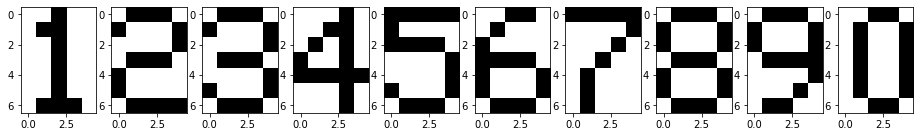

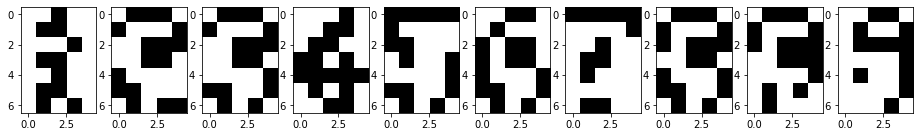

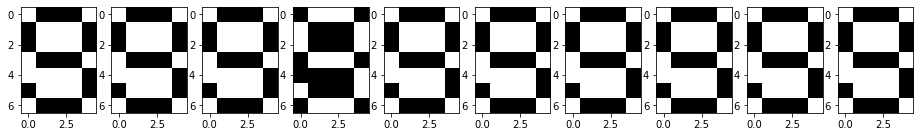

In [35]:
ruidoso_10 = np.copy(fundamentales)
        
a=np.random.choice([-1,1], 35, p=[0.1,0.9])

ruidoso_10 = [np.multiply(v,a.reshape(7,5)) for v in ruidoso_10]

resultado_10 = [red.recupero(v) for v in ruidoso_10]

#Grafico de las memorias fundamentales
pl.figure(figsize=(16,16))
for i in range(len(fundamentales)):
    pl.subplot(1,10,i+1)
    pl.imshow(fundamentales[i],cmap='binary')


#Grafico ruidoso
pl.figure(figsize=(16,16))

for i in range(len(ruidoso_10)):
    pl.subplot(1,10,i+1)
    pl.imshow(ruidoso_10[i],cmap='binary')
    

#Grafico recuperados
pl.figure(figsize=(16,16))

for i in range(len(resultado_10)):
    pl.subplot(1,10,i+1)
    pl.imshow(resultado_10[i],interpolation='None', cmap='binary')

### Con 20% del ruido

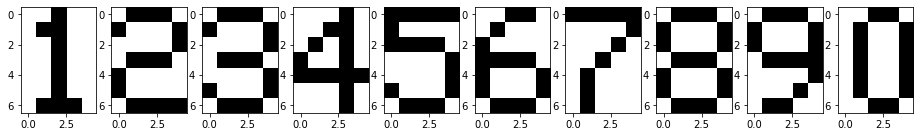

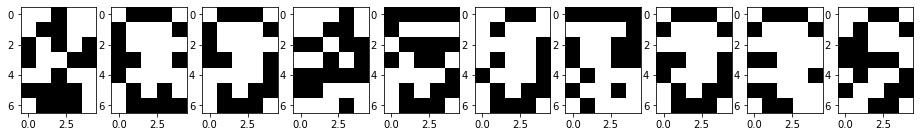

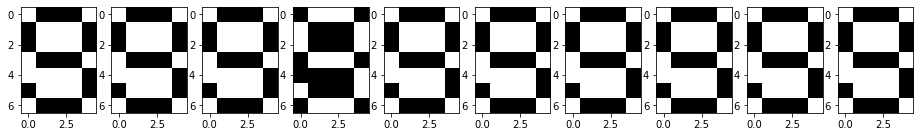

In [36]:
ruidoso_20 = np.copy(fundamentales)
        
a=np.random.choice([-1,1], 35, p=[0.2,0.8])

ruidoso_20 = [np.multiply(v,a.reshape(7,5)) for v in ruidoso_20]

resultado_20 = [red.recupero(v) for v in ruidoso_20]

#Grafico de las memorias fundamentales
pl.figure(figsize=(16,16))
for i in range(len(fundamentales)):
    pl.subplot(1,10,i+1)
    pl.imshow(fundamentales[i],cmap='binary')

#Grafico ruidoso
pl.figure(figsize=(16,16))

for i in range(len(ruidoso_20)):
    pl.subplot(1,10,i+1)
    pl.imshow(ruidoso_20[i],cmap='binary')
    

#Grafico recuperados
pl.figure(figsize=(16,16))

for i in range(len(resultado_20)):
    pl.subplot(1,10,i+1)
    pl.imshow(resultado_20[i],interpolation='None', cmap='binary')

### Con 50% del ruido

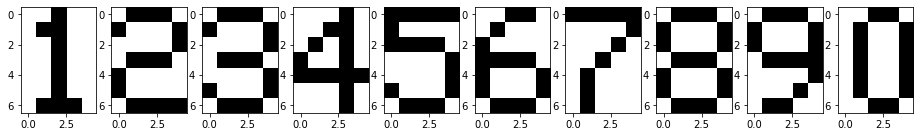

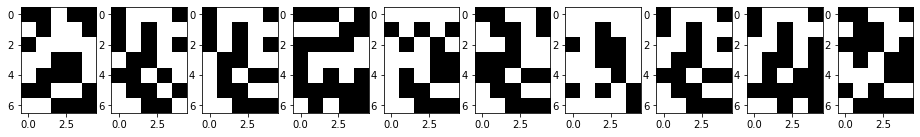

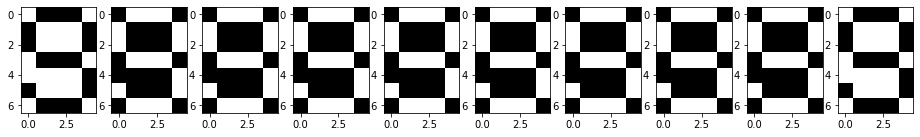

In [37]:
ruidoso_50 = np.copy(fundamentales)
        
a=np.random.choice([-1,1], 35, p=[0.5,0.5])

ruidoso_50 = [np.multiply(v,a.reshape(7,5)) for v in ruidoso_50]

resultado_50 = [red.recupero(v) for v in ruidoso_50]

#Grafico de las memorias fundamentales
pl.figure(figsize=(16,16))
for i in range(len(fundamentales)):
    pl.subplot(1,10,i+1)
    pl.imshow(fundamentales[i],cmap='binary')

#Grafico ruidoso
pl.figure(figsize=(16,16))

for i in range(len(ruidoso_50)):
    pl.subplot(1,10,i+1)
    pl.imshow(ruidoso_50[i],cmap='binary')
    

#Grafico recuperados
pl.figure(figsize=(16,16))

for i in range(len(resultado_50)):
    pl.subplot(1,10,i+1)
    pl.imshow(resultado_50[i],interpolation='None', cmap='binary')

### ¿Cuántas memorias fundamentales puede llegar a almacenar como máximo esta red?

In [21]:
print("La cantidad máxima de memorias fundamentales que soporta la red es: %", int(35/(2*np.log(35))))

La cantidad máxima de memorias fundamentales que soporta la red es: % 4


In [72]:
35/(2*np.log(35))

4.922162246097747

### Nueva red cumpliendo la capacidad maxima de memorias fundamentales

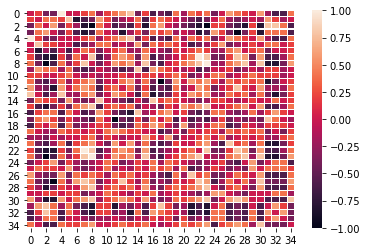

In [68]:
fundamentales_max = [n0,n1,n2,n3]

red_nueva = hopfield(fundamentales_max) 
red_nueva.entreno()

sb.heatmap(red.pesos,linewidth=0.1);

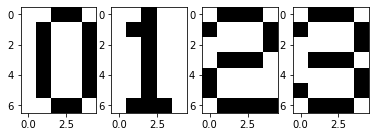

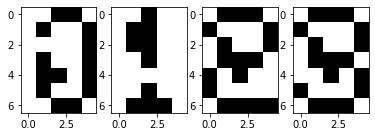

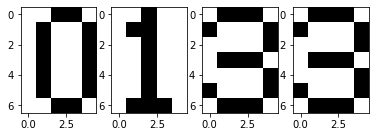

In [69]:
ruidoso_10_max = np.copy(fundamentales_max)
        
a=np.random.choice([-1,1], 35, p=[0.1,0.9])

ruidoso_10_max = [np.multiply(v,a.reshape(7,5)) for v in ruidoso_10_max]

resultado_10_max = [red_nueva.recupero(v) for v in ruidoso_10_max]

#Grafico de las memorias fundamentales
pl.figure(figsize=(16,16))
for i in range(len(fundamentales_max)):
    pl.subplot(1,10,i+1)
    pl.imshow(fundamentales_max[i],cmap='binary')


#Grafico ruidoso
pl.figure(figsize=(16,16))

for i in range(len(ruidoso_10_max)):
    pl.subplot(1,10,i+1)
    pl.imshow(ruidoso_10_max[i],cmap='binary')
    

#Grafico recuperados
pl.figure(figsize=(16,16))

for i in range(len(resultado_10_max)):
    pl.subplot(1,10,i+1)
    pl.imshow(resultado_10_max[i],interpolation='None', cmap='binary')

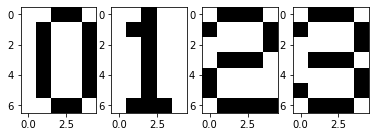

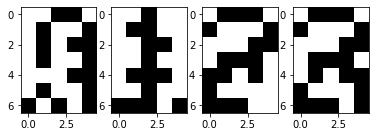

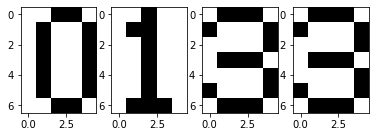

In [70]:
ruidoso_20_max = np.copy(fundamentales_max)
        
a=np.random.choice([-1,1], 35, p=[0.2,0.8])

ruidoso_20_max = [np.multiply(v,a.reshape(7,5)) for v in ruidoso_20_max]

resultado_20_max = [red_nueva.recupero(v) for v in ruidoso_20_max]

#Grafico de las memorias fundamentales
pl.figure(figsize=(16,16))
for i in range(len(fundamentales_max)):
    pl.subplot(1,10,i+1)
    pl.imshow(fundamentales_max[i],cmap='binary')


#Grafico ruidoso
pl.figure(figsize=(16,16))

for i in range(len(ruidoso_20_max)):
    pl.subplot(1,10,i+1)
    pl.imshow(ruidoso_20_max[i],cmap='binary')
    

#Grafico recuperados
pl.figure(figsize=(16,16))

for i in range(len(resultado_20_max)):
    pl.subplot(1,10,i+1)
    pl.imshow(resultado_20_max[i],interpolation='None', cmap='binary')

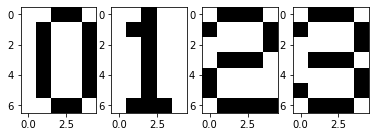

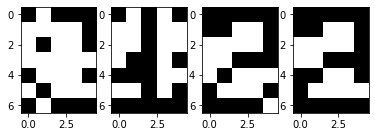

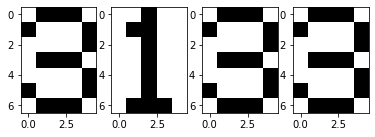

In [62]:
ruidoso_50_max = np.copy(fundamentales_max)
        
a=np.random.choice([-1,1], 35, p=[0.5,0.5])

ruidoso_50_max = [np.multiply(v,a.reshape(7,5)) for v in ruidoso_50_max]

resultado_50_max = [red_nueva.recupero(v) for v in ruidoso_50_max]

#Grafico de las memorias fundamentales
pl.figure(figsize=(16,16))
for i in range(len(fundamentales_max)):
    pl.subplot(1,10,i+1)
    pl.imshow(fundamentales_max[i],cmap='binary')


#Grafico ruidoso
pl.figure(figsize=(16,16))

for i in range(len(ruidoso_50_max)):
    pl.subplot(1,10,i+1)
    pl.imshow(ruidoso_50_max[i],cmap='binary')
    

#Grafico recuperados
pl.figure(figsize=(16,16))

for i in range(len(resultado_50_max)):
    pl.subplot(1,10,i+1)
    pl.imshow(resultado_50_max[i],interpolation='None', cmap='binary')